In [1]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/solar-energy-prediction


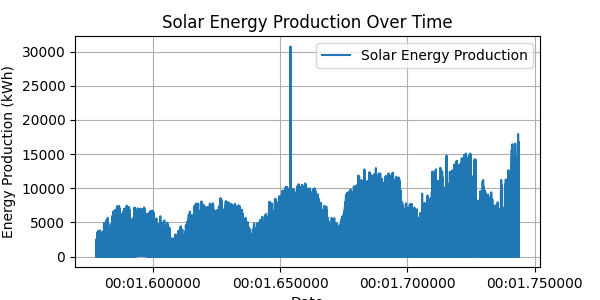

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


solar_data = pd.read_csv("data/energy/SOLAR.csv", index_col=0)
solar_data.head()
solar_data['datetime'] = pd.to_datetime(solar_data['end'])
plt.figure(figsize=(6, 3))
plt.plot(solar_data['datetime'], solar_data['values'], label='Solar Energy Production')
plt.title('Solar Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend()
plt.grid()
plt.show()

Index(['datetime', 'timestamp', 'station', 'station_name',
       'direct_normal_irradiance', 'cloud_cover', 'sunshine_duration',
       'precipitation', 'surface_pressure', 'relative_humidity_2m',
       'temperature_2m', 'wind_speed_10m', 'shortwave_radiation'],
      dtype='object')


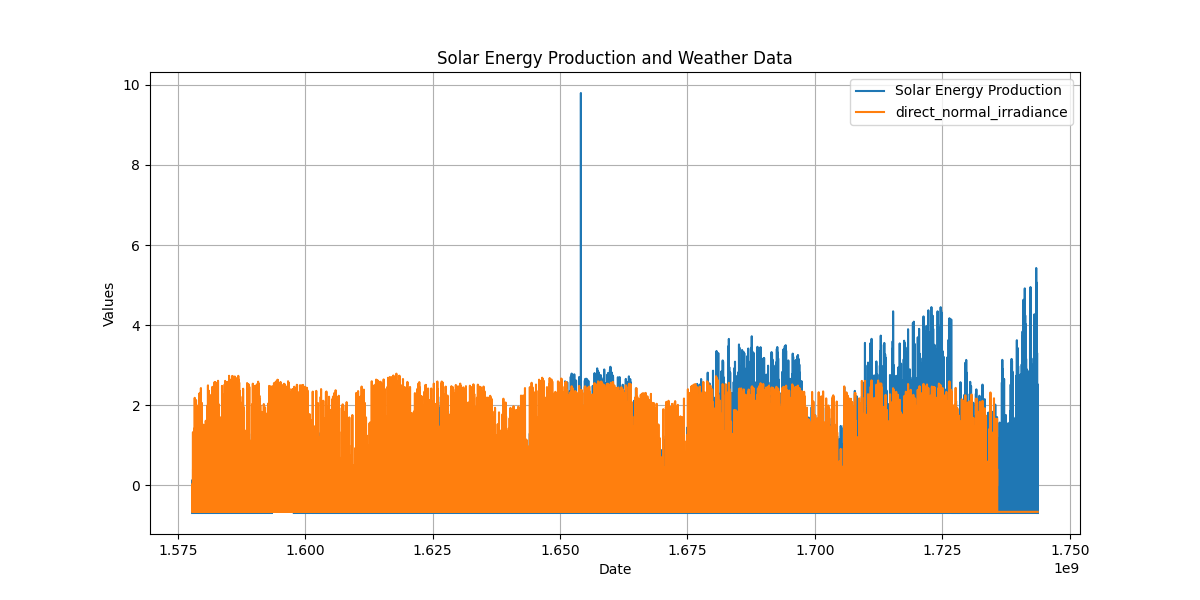

In [3]:
weather_data = pd.read_csv("data/raw/weather/lyon_hourly.csv")

print(weather_data.columns)
fused_data = pd.merge_asof(
    solar_data.sort_values('datetime'),
    weather_data.sort_values('datetime'),
    left_on='end',
    right_on='timestamp',
    direction='backward')


variables = ['direct_normal_irradiance', 'values']

normalized_data = fused_data

normalized_data[variables] = (
    fused_data[variables] - fused_data[variables].mean()) / fused_data[variables].std()

plt.figure(figsize=(12, 6))
plt.plot(normalized_data['end'], normalized_data['values'],
         label='Solar Energy Production')
for predictor in variables:
    if predictor == 'values':
        continue
    plt.plot(normalized_data['end'],
             normalized_data[predictor], label=predictor)
plt.title('Solar Energy Production and Weather Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

Correlation with Solar Energy Production:
direct_normal_irradiance: 0.72
cloud_cover: -0.07
sunshine_duration: 0.68
precipitation: -0.03
surface_pressure: 0.03
relative_humidity_2m: -0.52
temperature_2m: 0.43
wind_speed_10m: 0.09
shortwave_radiation: 0.84


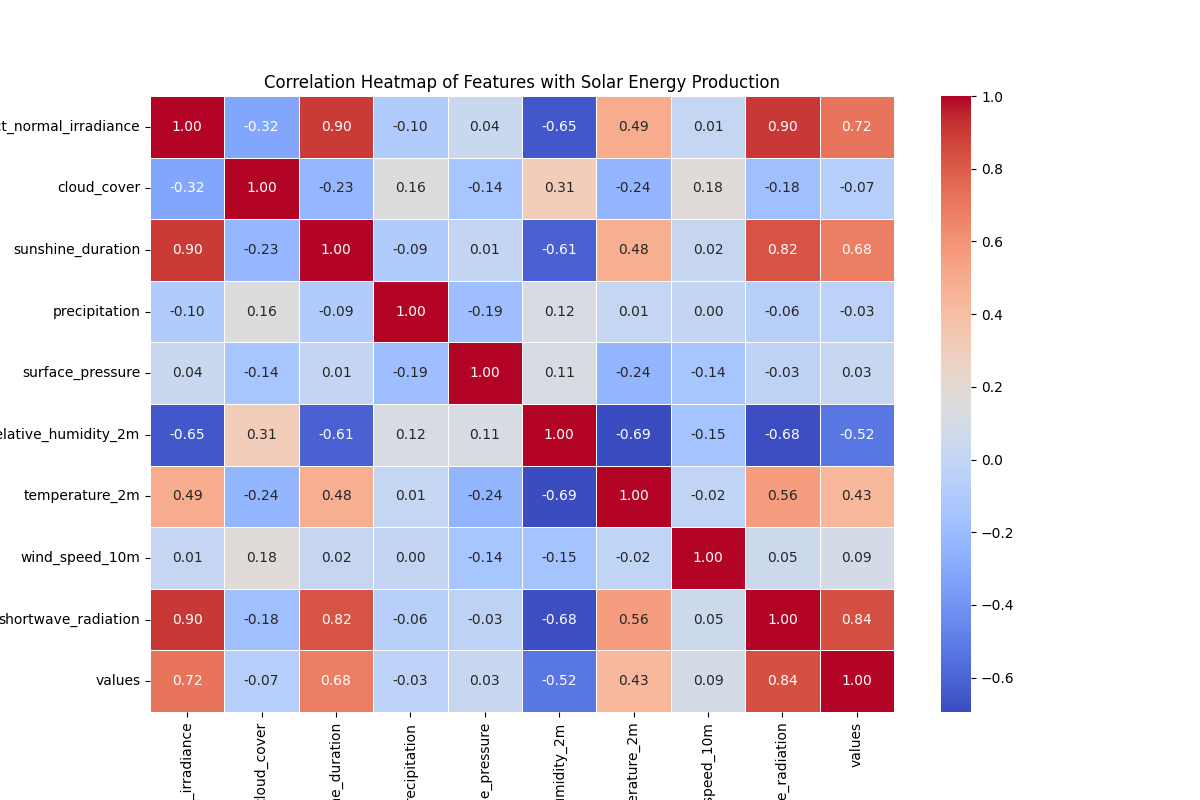

In [4]:
normalized_data.columns
features = [ 'direct_normal_irradiance', 'cloud_cover',
       'sunshine_duration', 'precipitation', 'surface_pressure',
       'relative_humidity_2m', 'temperature_2m', 'wind_speed_10m',
       'shortwave_radiation']

corr = {}
for feature in features:
    corr[feature] = normalized_data['values'].corr(normalized_data[feature])
print("Correlation with Solar Energy Production:")
for feature, correlation in corr.items():
    print(f"{feature}: {correlation:.2f}")

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data[features + ['values']].corr(), annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Solar Energy Production')
plt.show()